In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


In [3]:
data = pd.read_csv (r'C:/Users/rashi/Downloads/Micro Credit Project/Data file.csv')

In [4]:
data.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
data.shape

(209593, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
NULLS=data[data.isnull().any(axis=1)]
NULLS.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


In [10]:
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [11]:
data.sort_values(by="label", ascending=True).head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.5,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
144774,144775,0,07352I90849,814.0,2067.675000,2070.210000,2315.38,2738.43,5.0,0.0,1539,2,19.0,3078.0,1539.0,9.5,2,19,3078,1539.0,9.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,34.5,34.5,UPW,2016-07-05
93464,93465,0,90357I91197,291.0,1118.332000,1131.480000,4988.52,5542.80,11.0,0.0,10000,2,16.0,13178.0,6589.0,28.5,2,16,13178,6589.0,28.50,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-03
23889,23890,0,46913I95207,92.0,25.083333,28.583333,410.78,1033.22,1.0,0.0,770,1,0.0,770.0,770.0,13.0,2,40,1543,771.5,11.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-07-23
188683,188684,0,98114I70780,610.0,1000.693333,1000.800000,859.04,991.20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-04
93466,93467,0,42918I89231,262.0,33.900000,33.900000,150.00,150.00,19.0,0.0,2309,1,0.0,2309.0,2309.0,35.0,1,0,2309,2309.0,35.00,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,5.5,5.5,UPW,2016-06-30
74091,74092,0,89081I89234,909.0,1803.033333,1807.000000,9705.23,12487.28,12.0,0.0,770,1,0.0,770.0,770.0,80.0,2,24,1540,770.0,45.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-17
188689,188690,0,48398I70780,245.0,0.266667,0.800000,934.20,2802.60,54.0,0.0,2320,0,0.0,0.0,0.0,0.0,1,0,2320,2320.0,8.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-20
49284,49285,0,79024I70780,167.0,5.500000,5.500000,346.28,346.28,6.0,0.0,1547,1,0.0,1547.0,1547.0,322.0,1,0,1547,1547.0,322.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-06-11
188691,188692,0,44388I84456,605.0,1581.320333,1609.894333,145.13,236.27,8.0,35.0,770,1,0.0,770.0,770.0,48.0,4,4,5494,773.0,43.75,0.0,0.0,1,0,1,6,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-07-23


In [12]:
data.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data.corr()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,0.003320,0.003181,0.000123,-0.001371,0.001258,0.002329,-0.000249,0.000523,-0.000298,-0.001947,0.000888,-0.002504,-0.001324,-0.002827,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

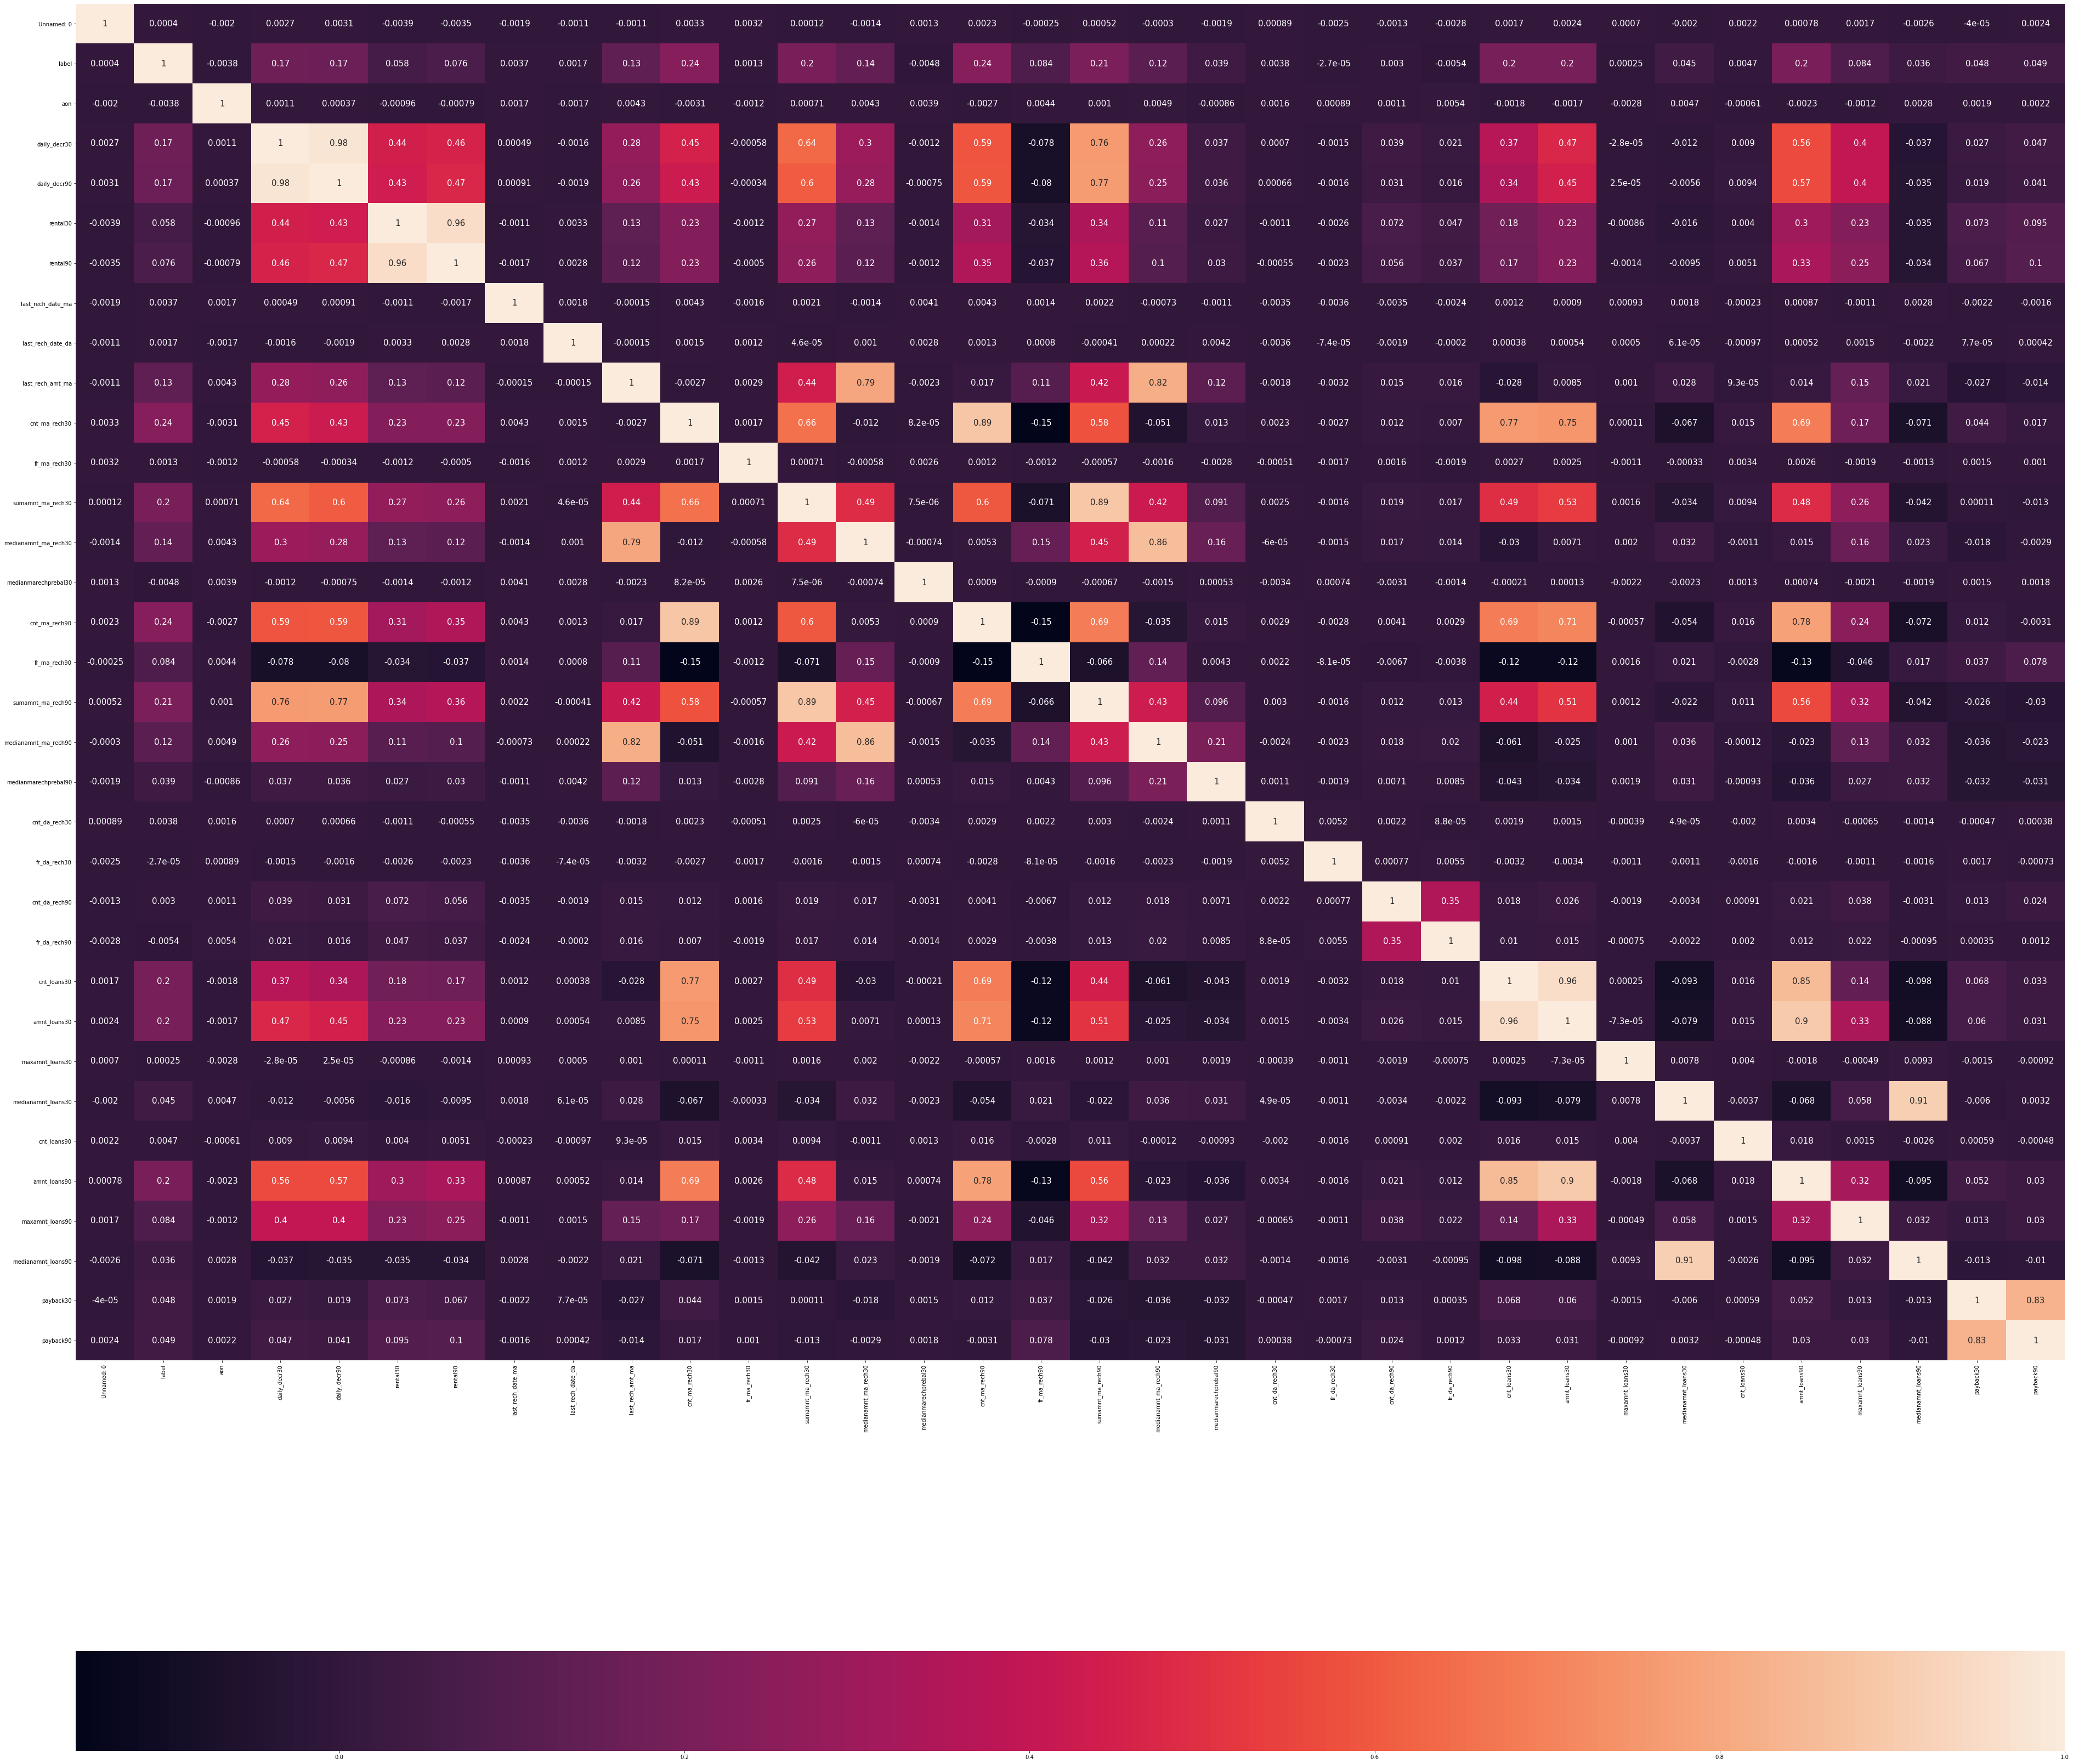

In [15]:
plt.figure(figsize=(65,65))
sns.heatmap(data.corr(),annot=True,cbar_kws={'orientation':'horizontal'},annot_kws={'size':15})

In [16]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [17]:
len(data.columns)

37

In [18]:
data.drop(['aon','medianmarechprebal30','fr_da_rech30','fr_da_rech90'],axis=1,inplace=True)

In [19]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [20]:
data.drop(['Unnamed: 0','pdate'],inplace=True,axis=1)

In [21]:
len(data.columns)

31

In [22]:
data.columns

Index(['label', 'msisdn', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'cnt_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle'],
      dtype='object')

In [23]:
len(data.columns)

31

In [24]:
data.drop(['msisdn'],inplace=True,axis=1)

In [25]:
data.dtypes

label                     int64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
cnt_da_rech90             int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback90               float64
pcircle                  object
dtype: object

In [26]:
data['pcircle'].nunique()

1

In [27]:
# since pcicle denote the telephone circle and has just a single value UPW  

In [28]:
data.drop(['pcircle'],axis=1,inplace =True)

In [29]:
data.dtypes

label                     int64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
cnt_da_rech90             int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback90               float64
dtype: object

In [30]:
# since the dtype doesn't have any object type data ..therefore no need for encoding 

In [31]:
from sklearn.preprocessing import StandardScaler    #pca
scaler=StandardScaler()
scaledx=scaler.fit_transform(data)

In [32]:
scaledx

array([[-2.64789583, -0.25229941, -0.27634619, ..., -0.22959366,
         2.9046997 ,  2.39409346],
       [ 0.37765836,  0.73103667,  0.5533797 , ..., -0.22959366,
        -0.38562959, -0.41923266],
       [ 0.37765836, -0.43201111, -0.42903256, ..., -0.22959366,
        -0.38562959, -0.41923266],
       ...,
       [ 0.37765836,  0.70079045,  0.53319431, ..., -0.22959366,
         0.06820893, -0.04735622],
       [ 0.37765836,  0.77075515,  0.59455827, ..., -0.22959366,
        -0.38562959,  0.59938541],
       [ 0.37765836, -0.09674426, -0.14174607, ..., -0.22959366,
        -0.38562959, -0.41923266]])

In [33]:
from sklearn.decomposition import PCA
testpca= PCA()
Y=testpca.fit(scaledx)

In [34]:
Y.explained_variance_ratio_

array([0.23913656, 0.11030561, 0.0672791 , 0.065267  , 0.05829313,
       0.03624256, 0.03477509, 0.03466556, 0.03457934, 0.03449581,
       0.0343914 , 0.0343098 , 0.03424473, 0.03393541, 0.0312487 ,
       0.02901787, 0.02779137, 0.0178079 , 0.01008741, 0.00712675,
       0.00620416, 0.00572053, 0.00459434, 0.00299298, 0.0020289 ,
       0.00142485, 0.00082017, 0.00070379, 0.00050919])

In [35]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 23.91365586,  34.94421687,  41.67212644,  48.19882606,
        54.02813919,  57.6523956 ,  61.12990424,  64.59646004,
        68.05439385,  71.503975  ,  74.94311471,  78.37409489,
        81.79856754,  85.19210879,  88.31697862,  91.21876535,
        93.99790248,  95.77869252,  96.7874335 ,  97.50010851,
        98.12052492,  98.69257834,  99.15201262,  99.45131041,
        99.65420066,  99.79668573,  99.87870229,  99.94908126,
       100.        ])

In [36]:
FinalPCA=PCA(n_components=22)
FinalData=FinalPCA.fit_transform(scaledx)

In [37]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-1.693381,-0.260364,2.575277,-1.620649,-1.993601,-1.565940,0.003249,-0.020973,-0.021862,-0.007809,0.018040,-0.045655,0.006524,-0.195608,-0.636353,-1.384837,1.949745,0.054941,-0.154552,-0.018189,0.012422,-0.391882
1,0.499999,3.201173,-0.260888,-0.447164,0.604365,-0.897997,0.088189,-0.120169,-0.055879,-0.247696,0.048658,-0.147181,-0.110991,-0.848578,0.833726,-1.055215,-2.098978,-0.046637,-0.405254,-0.183213,-0.781085,-0.317985
2,-1.924016,0.128659,-0.534212,-0.192461,0.355595,-0.193082,0.020393,-0.084403,0.021152,0.001451,0.038590,-0.088358,-0.000955,0.104002,0.204209,0.596410,-0.674165,-0.233174,0.095295,-0.050134,-0.071606,-0.031866
3,-2.072909,-0.727354,-0.588077,-0.067096,0.261259,-0.153638,0.030394,-0.098227,-0.004168,-0.052950,0.042855,-0.115621,-0.027902,-0.054600,0.250661,0.416943,-0.719312,-0.470585,0.269398,0.181910,0.258145,0.071677
4,1.568368,-0.691827,-1.388708,0.015745,-1.378321,0.331868,0.148653,0.034163,0.166724,0.168536,0.210102,-0.041087,-0.073360,0.239962,-1.030334,-0.277550,-0.517336,0.130528,0.941490,-0.020713,0.187945,0.136461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.723946,1.159716,-0.926406,-0.315123,-0.435936,0.007967,0.071695,-0.020966,0.092919,0.083866,0.113298,-0.055164,-0.023260,0.207319,-0.470477,0.328700,-0.709199,0.151261,0.071380,0.143514,0.040126,0.015899
209589,-0.986212,-1.032146,-0.545420,-0.040367,0.064498,0.242718,0.047328,-0.056940,0.087800,0.111177,0.088501,-0.074230,-0.005207,0.342748,0.030265,0.285120,-0.497304,0.012955,0.021047,-0.037719,-0.063203,-0.020873
209590,2.456717,-0.783207,0.562744,-0.056635,0.801850,-0.173375,0.028672,-0.185628,-0.083014,-0.225085,0.004447,-0.227636,-0.100887,-0.580362,1.056295,-1.368094,-1.298981,0.298989,0.073383,-0.125491,0.173979,-0.052422
209591,0.873015,-0.053584,0.188434,-0.067278,0.217072,-0.925433,1.120400,0.399453,0.570116,0.473845,1.067777,0.651663,-0.483863,-1.814286,2.150987,-0.103470,-0.532297,0.886543,0.194682,-0.102623,-0.338202,0.565110


In [38]:
k=np.argmax(var_cumu>99)
print('number of components explaining 99% variance:',k)

number of components explaining 99% variance: 22


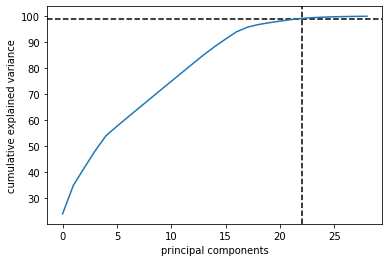

In [39]:
plt.ylabel('cumulative explained variance')
plt.xlabel('principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='k',linestyle='--')
plt.plot(var_cumu)
plt.show()

In [40]:
data.head()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,2,21,3078,1539.0,7.50,0.0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,1,0,5787,5787.0,61.04,0.0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,1,0,1539,1539.0,66.32,0.0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,1,0,947,947.0,2.50,0.0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,8,2,23496,2888.0,35.00,0.0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [41]:
data['label'].unique()

array([0, 1], dtype=int64)

In [42]:
data['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

eda

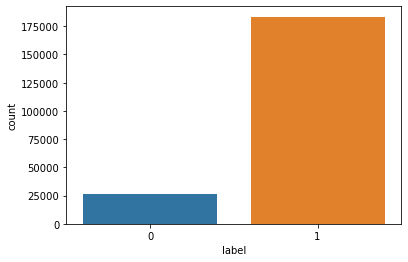

In [43]:
sns.countplot(data['label']);

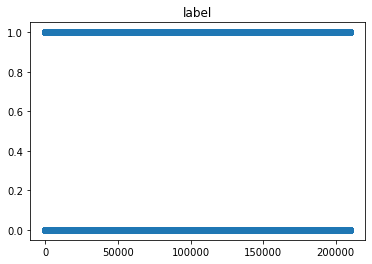

In [44]:
plt.scatter(data.index,data['label'])      #univariate analysis
plt.title('label')
plt.show()

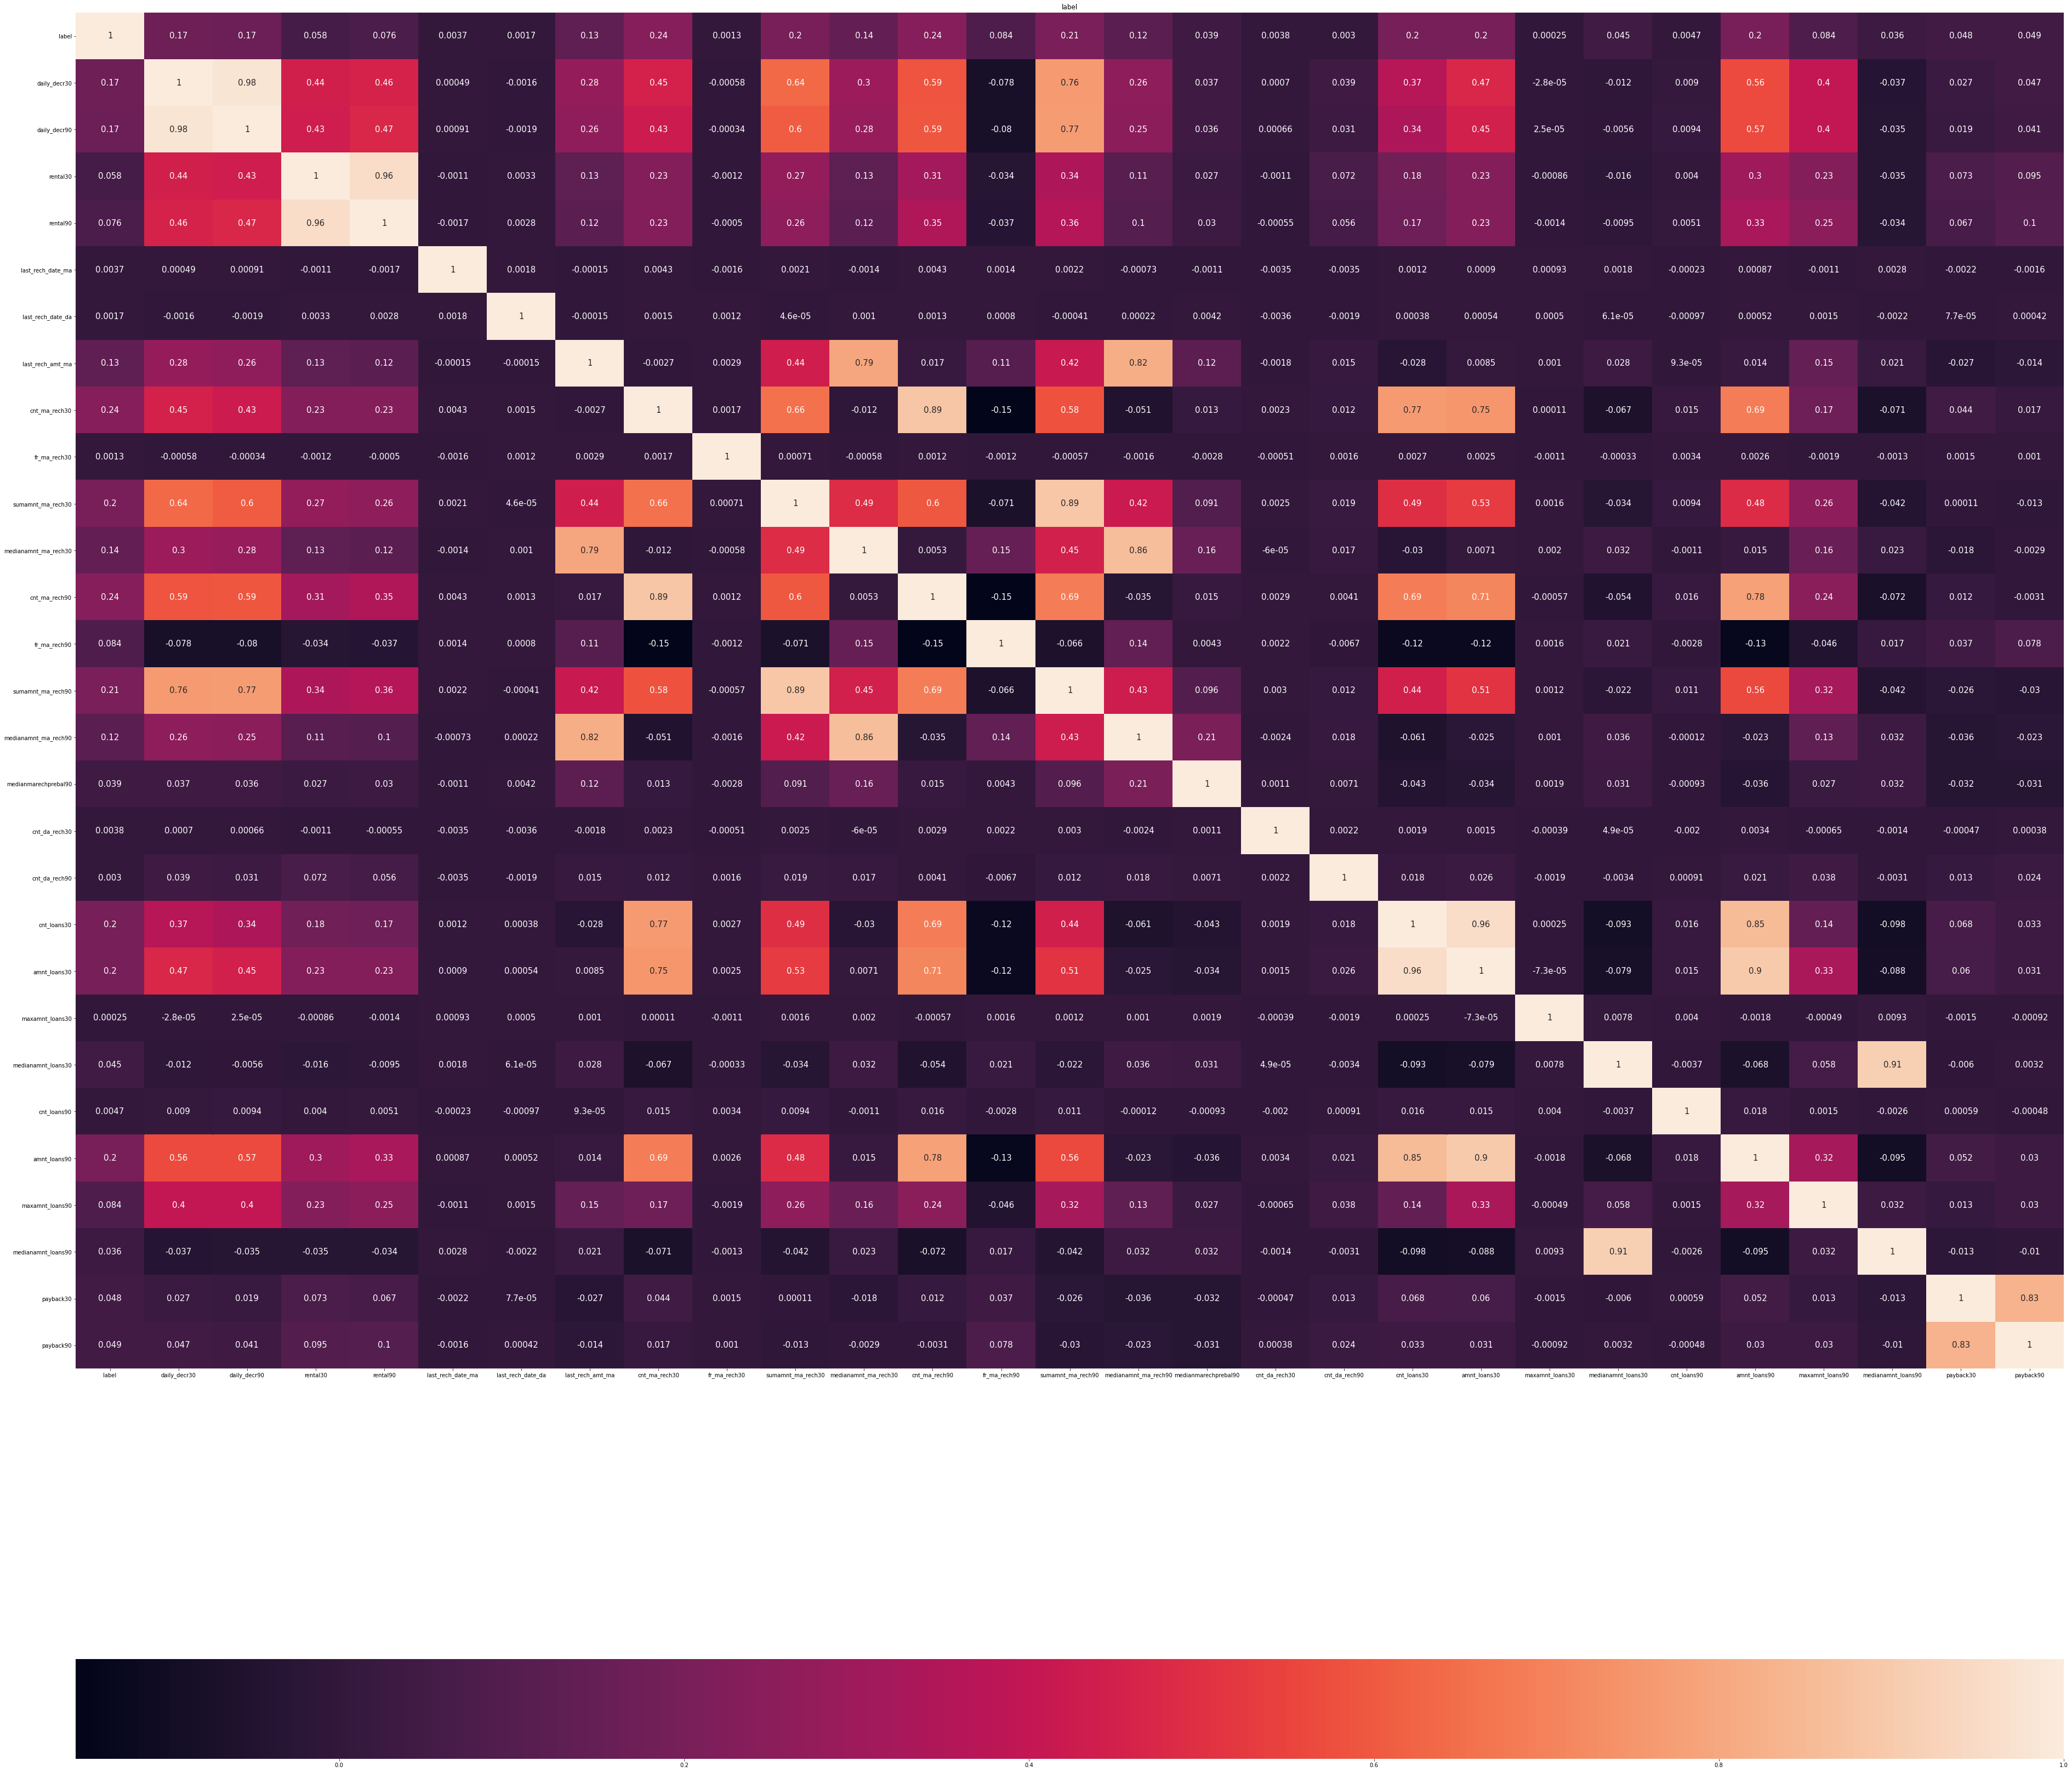

In [45]:
plt.figure(figsize=[65,65])
sns.heatmap(data.corr(),annot=True,cbar_kws={'orientation':'horizontal'},annot_kws={'size':15})
plt.title('label')
plt.show()

<AxesSubplot:ylabel='label'>

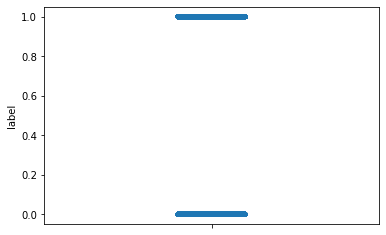

In [46]:
sns.stripplot(y=data['label'])      #strip plot

(array([ 26162.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 183431.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

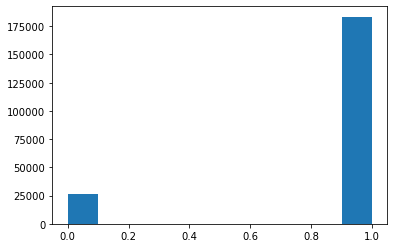

In [47]:
plt.hist(data['label'])

<AxesSubplot:ylabel='Density'>

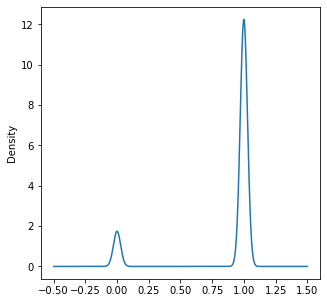

In [48]:
plt.figure(figsize=(5,5))
data['label'].plot(kind='density')

{'whiskers': [<matplotlib.lines.Line2D at 0x138a0026f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1389db668e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1389db11ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1389db2ea00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1389fffcac0>],
 'means': []}

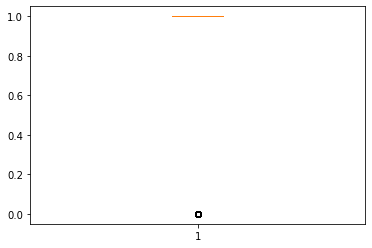

In [49]:
plt.boxplot(data['label'])

In [52]:
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [53]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>